In [1]:
from keras.models import load_model
import os
import PIL.Image as Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# go to parent directory
os.chdir("..")
import paths

REPO_DIR = paths.get_repo_path()
ROOT_DIR = REPO_DIR / "Stanford Dogs"
REAL_LIFE_IMAGES_DIR = REPO_DIR / "real-life-images"
MODEL_PATH = ROOT_DIR / "models"
DATA_BASE_PATH = paths.get_data_path() / "stanford-dogs-dataset"
DATA_PATH = DATA_BASE_PATH / "splited-data"
TRAIN_PATH = DATA_PATH / "train"


os.chdir(REPO_DIR)

In [3]:
MODEL_INPUT_SHAPE = (224, 224)

In [4]:
images = [
    "Oscar(rottweiler).jpeg",       # This is my good boy, he's 9.5 years old(born Feb,2013).
    "labrador.jpg",                 # This good boy was lost, lucky for him somebody gave him a new home.
    "Great Dane.jpeg",
    "tibetan-mastiff.jpeg",
    ]
images_path = [REAL_LIFE_IMAGES_DIR / image for image in images]

CLASS_NAMES = sorted([img_cls for img_cls in  os.listdir(TRAIN_PATH) if img_cls != ".DS_Store"])

images = [Image.open(image_path).resize(MODEL_INPUT_SHAPE) for image_path in images_path]
# convert to rgb
images = [image.convert("RGB") for image in images]

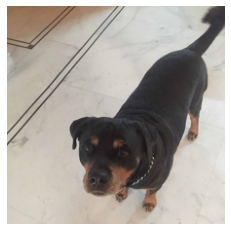

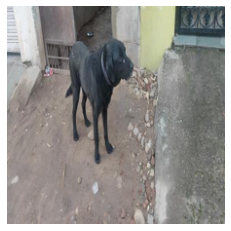

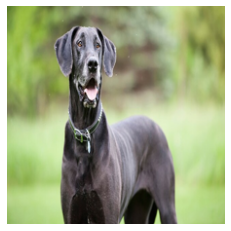

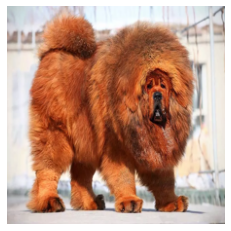

In [5]:
for image in images:
    plt.imshow(image)
    plt.axis('off')
    plt.show()

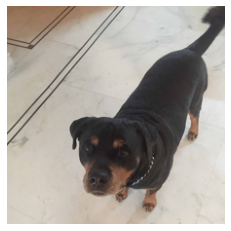

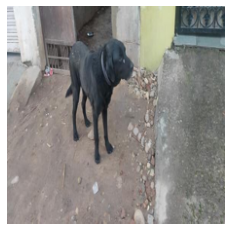

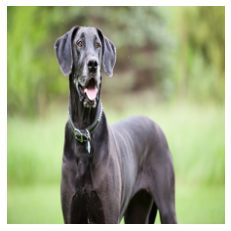

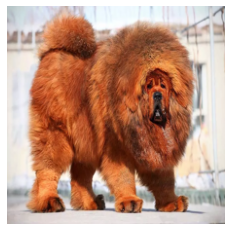

In [9]:
image_rotate_angle = [
    0,
    0,
    0,
    0,
]
rotated_images = [image.rotate(angle) for image, angle in zip(images, image_rotate_angle)]
input_images = np.array([np.array(image) for image in rotated_images]) / 255

for image in input_images:
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [7]:
model_name = "TL-Inception-net-V3.h5"
model = load_model(MODEL_PATH / model_name)

2022-07-11 19:50:33.864749: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-11 19:50:33.864845: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



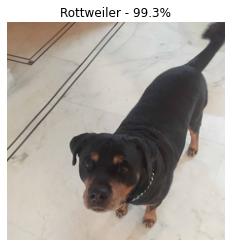

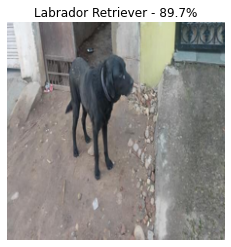

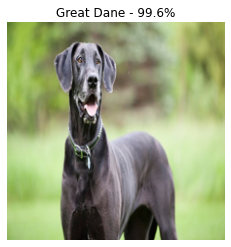

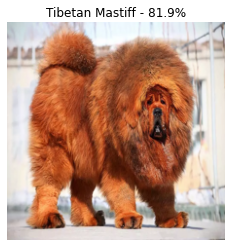

In [10]:
predictions_ohe = model.predict(input_images)
predictions_prob = predictions_ohe.max(axis=1)
predictions = predictions_ohe.argmax(axis=1)

for i, image in enumerate(input_images):
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{CLASS_NAMES[predictions[i]]} - {100*predictions_prob[i]:.1f}%")
    plt.show()